Use **md_solutions.py**; download all solution info, reformat and merge with compound info from Guillermo

## MediaDive API

In [1]:
import md_solutions as mds

id_list = list(range(1,10)) #1,7000 to encompass all solutions as far as I can tell

composition_df = mds.get_solutions(id_list) 

 33%|███▎      | 3/9 [00:00<00:00, 11.56it/s]

Request failed with status code: 404


100%|██████████| 9/9 [00:00<00:00, 13.37it/s]


In [2]:
# Some formatting
df = composition_df.copy()
df['solution_id'] = df['solution_id'].str[0]
df['solution_name'] = df['solution_name'].str[0]
df['steps'] = df['steps'].str[0].str[0]

#df.to_csv('~/Desktop/MediaDive_solutions.csv', index=False)
df

,solution_id,solution_name,component,component_id,component_gl,sub_sol,sub_component,sub_component_id,steps
0,1,Main sol. 1,"[Peptone, Meat extract, Agar, Distilled water]","[1, 2, 3, 4]","[5, 3, 15, None]",[],[],[],"{'recipe_order': None, 'step': 'Adjust pH to 7..."
1,3,Main sol. 1a,"[Peptone, Meat extract, Agar, Distilled water]","[1, 2, 3, 4]","[5, 3, 15, None]",[],[],[],"{'recipe_order': None, 'step': 'Adjust pH to 7..."
2,4,Main sol. 2,[Urea],[339],[20],[1],"[Peptone, Meat extract, Agar, Distilled water]","[1, 2, 3, 4]","{'recipe_order': None, 'step': 'To medium 1 ad..."
3,5,Main sol. 3,"[Glucose, Mannitol, CaCl2 x 2 H2O, MgSO4 x 7 H...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 3, 4]","[5, 5, 0.1, 0.1, 0.005, 0.9, 0.1, 0.01, 5, 15,...",[],[],[],"{'recipe_order': None, 'step': 'Adjust pH to 7..."
4,6,Main sol. 6,"[K2HPO4, KH2PO4, MgSO4 x 7 H2O, CaCl2 x 2 H2O,...","[10, 11, 8, 7, 12, 14, 15, 3, 4]","[0.8, 0.2, 0.5, 0.05, 0.01, 0.001, 20, 15, None]",[],[],[],NaN
5,7,Main sol. 7,"[Glucose, Peptone, Yeast extract, Agar, Distil...","[5, 1, 16, 3, 4]","[1, 1, 1, 15, None]",[],[],[],"{'recipe_order': None, 'step': 'Adjust pH to 7..."
6,8,Main sol. 8,"[Glucose, Peptone, Yeast extract, CaCO3, Agar,...","[5, 1, 16, 13, 3, 4]","[5, 5, 5, 5, 15, None]",[],[],[],"{'recipe_order': None, 'step': 'Adjust pH to 6..."
7,9,Main sol. 9,"[Baker's yeast, CaCl2 x 2 H2O, Vitamin B12, Ag...","[17, 7, 18, 3, 4]","[5, 1.36, 0.0005, 15, None]",[],[],[],"{'recipe_order': None, 'step': 'Sterilize vita..."


## Merge w/ compounds

In [4]:
import pandas as pd

compounds = pd.read_csv("~/Desktop/Ghost/MediaDive_ingredients.csv") # From Guillermo
solutions = pd.read_csv("~/Desktop/Ghost/MediaDive_solutions.csv") # From above

solutions.head()

,solution_id,solution_name,component,component_id,component_gl,sub_sol,sub_component,sub_component_id,steps
0,1,Main sol. 1,"['Peptone', 'Meat extract', 'Agar', 'Distilled...","[1, 2, 3, 4]","[5, 3, 15, None]",[],[],[],"{'recipe_order': None, 'step': 'Adjust pH to 7..."
1,3,Main sol. 1a,"['Peptone', 'Meat extract', 'Agar', 'Distilled...","[1, 2, 3, 4]","[5, 3, 15, None]",[],[],[],"{'recipe_order': None, 'step': 'Adjust pH to 7..."
2,4,Main sol. 2,['Urea'],[339],[20],[1],"['Peptone', 'Meat extract', 'Agar', 'Distilled...","[1, 2, 3, 4]","{'recipe_order': None, 'step': 'To medium 1 ad..."
3,5,Main sol. 3,"['Glucose', 'Mannitol', 'CaCl2 x 2 H2O', 'MgSO...","[5, 6, 7, 8, 9, 10, 11, 12, 13, 3, 4]","[5, 5, 0.1, 0.1, 0.005, 0.9, 0.1, 0.01, 5, 15,...",[],[],[],"{'recipe_order': None, 'step': 'Adjust pH to 7..."
4,6,Main sol. 6,"['K2HPO4', 'KH2PO4', 'MgSO4 x 7 H2O', 'CaCl2 x...","[10, 11, 8, 7, 12, 14, 15, 3, 4]","[0.8, 0.2, 0.5, 0.05, 0.01, 0.001, 20, 15, None]",[],[],[],NaN


In [5]:
# Copy solution dataframe
sol_df = solutions.copy()
sol_df = sol_df[["solution_id","component_id","sub_component_id"]]

# Remove brackets
sol_df["component_id"] = sol_df["component_id"].str.strip('[]')
sol_df["sub_component_id"] = sol_df["sub_component_id"].str.strip('[]')

# Join compound IDs into one column, and remove duplicate IDs
sol_df['Compounds'] = sol_df[['component_id','sub_component_id']].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)
sol_df['Compounds'] = sol_df['Compounds'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))))
sol_df = sol_df[["solution_id","Compounds"]]

# Split and explode on solution_id, regroup by Compound
sol_df = sol_df.assign(Compounds=sol_df['Compounds'].str.split(', ')).explode('Compounds')
cpd_sol = sol_df.groupby('Compounds')['solution_id'].agg(list).reset_index()

# Formatting
cpd_sol["solution_id"] = cpd_sol["solution_id"].astype(str)
cpd_sol["solution_id"] = cpd_sol["solution_id"].str.strip('[]')
cpd_sol = cpd_sol.rename(columns={"Compounds": "Compound ID"})
cpd_sol = cpd_sol.iloc[1:].reset_index(drop=True) # with parsing = '', e.g., solutions without subsolutions
filter = cpd_sol["Compound ID"].str.contains("None") # solutions recorded, but with no data filled
cpd_sol = cpd_sol[~filter]

cpd_sol.head()

,Compound ID,solution_id
0,1,"1, 3, 4, 7, 8, 21, 57, 64, 136, 145, 171, 173,..."
1,10,"5, 6, 12, 13, 14, 19, 48, 56, 58, 64, 67, 70, ..."
2,1000,"2252, 2253, 2269, 2821, 3560, 3628, 3632, 3634..."
3,1002,"2252, 2253, 2821, 4041, 4081, 4089, 4091, 4151..."
4,1005,2260


In [ ]:
cpd_sol['Compound ID'] = cpd_sol['Compound ID'].astype("float64")
merged_df = pd.merge(left=compounds, right=cpd_sol, on="Compound ID", how="left")
merged_df = merged_df.rename(columns={"solution_id": "Used in Solutions:"})

#merged_df.to_csv("~/Desktop/Ghost/MediaDive_components.csv", index = False)
merged_df.head()

,Compound ID,Name,Group,Element,ChEBI,CAS Number,KEGG-ID,Mass [g/mol],Formula,Density,Used in Solutions:
0,1,Peptone,Peptone,Undefined,NaN,73049-73-7,NaN,NaN,NaN,NaN,"1, 3, 4, 7, 8, 21, 57, 64, 136, 145, 171, 173,..."
1,2,Meat extract,Meat extract,Undefined,NaN,NaN,NaN,NaN,NaN,NaN,"1, 3, 4, 12, 13, 14, 79, 80, 163, 171, 205, 49..."
2,3,Agar,Agar,Undefined,2509.0,9002-18-0,C08815,0.0000,(C12H18O9)n,NaN,"1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 18, 19..."
3,4,Distilled water,Distilled water,Undefined,15377.0,7732-18-5,C00001,18.0153,H2O,1.00293,"1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16..."
4,5,Glucose,Glucose,NaN,17234.0,50-99-7,C00293,180.1600,C6H12O6,1.54400,"5, 7, 8, 11, 12, 13, 14, 16, 18, 21, 64, 68, 6..."


## EDA / visualization

In [2]:
import pandas as pd

df = pd.read_csv("~/Desktop/Ghost/MediaDive_components.csv")
df = df[["Compound ID", "Name", "Element", "Used in Solutions:"]]

df['Used in Solutions:'] = df['Used in Solutions:'].fillna("").astype(str)
df['Element'] = df['Element'].astype(str)

df['Used in Solutions:'] = df['Used in Solutions:'].apply(lambda x: [int(num.strip()) for num in x.split(',') if num.strip().isdigit()])
df['Number of Solutions:'] = df['Used in Solutions:'].apply(len)
df['Number of Solutions:'] = df['Number of Solutions:'].fillna(0).astype(int)

df = df.sort_values(by='Number of Solutions:', ascending=False)

df.head()

,Compound ID,Name,Element,Used in Solutions:,Number of Solutions:
3,4,Distilled water,Undefined,"[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",4652
37,43,NaCl,Na;Cl,"[22, 24, 35, 36, 60, 61, 63, 68, 70, 72, 80, 1...",2138
6,7,CaCl2 x 2 H2O,Ca;Cl,"[5, 6, 9, 10, 16, 17, 22, 24, 26, 27, 37, 38, ...",2012
15,16,Yeast extract,Undefined,"[7, 8, 11, 12, 13, 14, 16, 17, 19, 21, 22, 24,...",2012
7,8,MgSO4 x 7 H2O,Mg;S,"[5, 6, 12, 13, 14, 16, 17, 22, 24, 26, 31, 37,...",1853


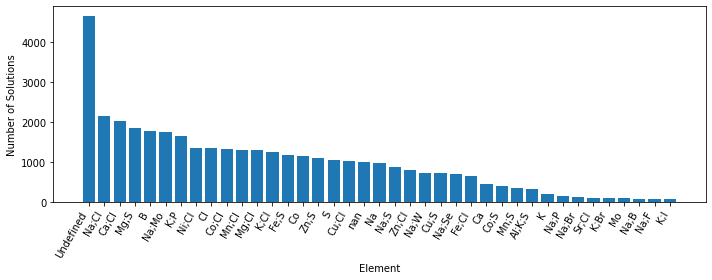

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

df2 = df.head(100)
plt.bar(df2['Element'], df2['Number of Solutions:']) # can change to name to look at everything rather than just the curated trace elements

plt.xlabel('Element')
plt.ylabel('Number of Solutions')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()

plt.show()